<a href="https://colab.research.google.com/github/mlin3happy/ML-Learning/blob/main/Unsupervised_Learning_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import time


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv", delimiter=",")
df=df.loc[:,('Survived','Pclass','Sex','Age','SibSp','Parch','Fare')]
df.dropna(inplace=True)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Sex=le.fit_transform(df.Sex)
X=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y)
data=x_train


# **Step 1: K means, Gausian Mixture**

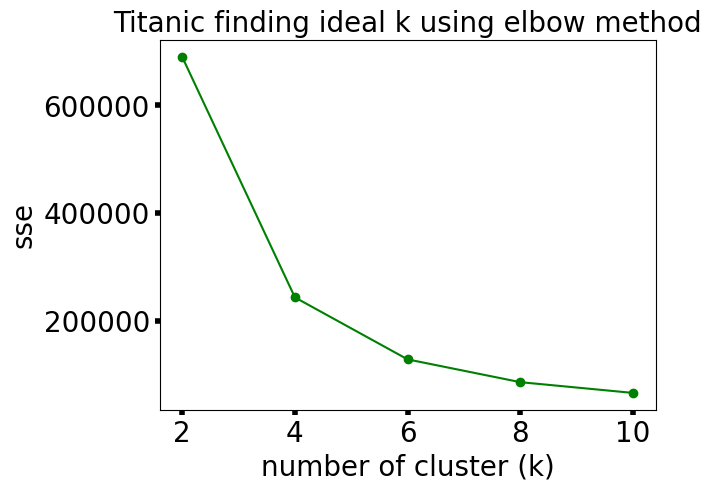

In [ ]:
# https://stackoverflow.com/questions/43784903/scikit-k-means-clustering-performance-measure


n_clusters=[2,4,6,8,10]
sse=[]
score=[]
required_time=[]
for k in n_clusters:
  starttime=time.time()
  kmeans=KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=42).fit(data)
  sse.append(kmeans.inertia_)
  score.append(silhouette_score(data, kmeans.labels_))
  required_time.append(time.time()-starttime)

plt.plot(n_clusters, sse, color="green", marker="o")
plt.xlabel("number of cluster (k)",fontsize=20)
plt.ylabel("sse",fontsize=20)
plt.title("Titanic finding ideal k using elbow method", fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()





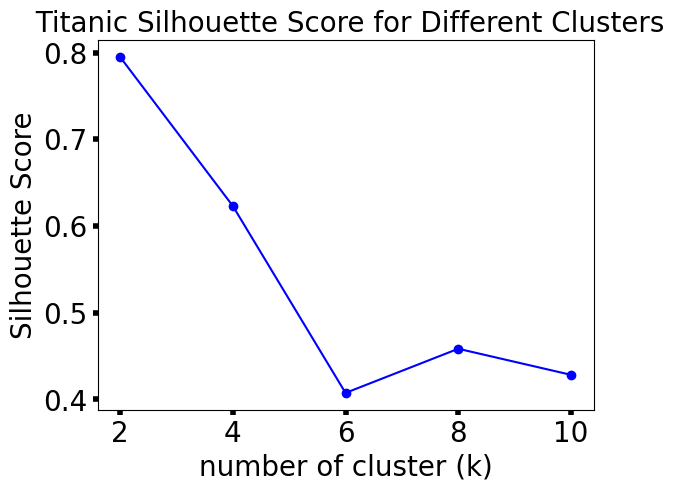

In [ ]:
plt.plot(n_clusters, score, color='b', marker="o")
plt.xlabel("number of cluster (k)", fontsize=20)
plt.ylabel("Silhouette Score", fontsize=20)
plt.title(" Titanic Silhouette Score for Different Clusters",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

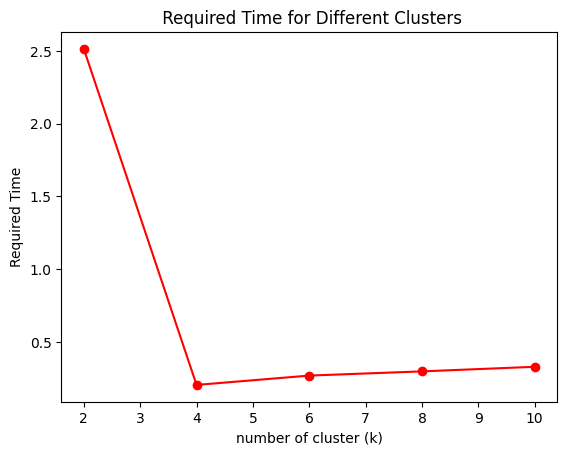

In [ ]:
plt.plot(n_clusters, required_time, color='r', marker="o")
plt.xlabel("number of cluster (k)")
plt.ylabel("Required Time")
plt.title(" Required Time for Different Clusters")
plt.show()

for gaussian mixture Titanic Dataset, best combined hyperparameter is ('tied', 2)


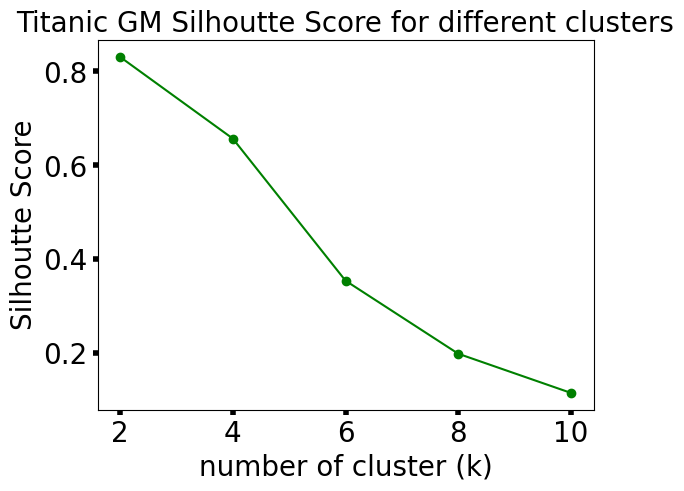

In [ ]:
from itertools import product

from sklearn.mixture import GaussianMixture
covariance_list=['full', "tied","diag","spherical"]
combined_parameter=list(product(covariance_list,n_clusters))
score=[]
for i in combined_parameter:
  gm=GaussianMixture(n_components=i[1], covariance_type=i[0], random_state=42)
  gm.fit(data)
  labels=gm.predict(data)
  score.append(silhouette_score(data, labels))
best_score=max(score)
best_score_loc=score.index(best_score)
best_hyperparameter=combined_parameter[best_score_loc]
print("for gaussian mixture Titanic Dataset, best combined hyperparameter is {}".format(best_hyperparameter))

score=[]
required_time=[]
for k in n_clusters:
  starttime=time.time()
  gauss_M=GaussianMixture(n_components=k, covariance_type='tied', random_state=42)
  gauss_M.fit(data)
  score.append(silhouette_score(data, gauss_M.predict(data)))
  required_time.append(time.time()-starttime)

plt.plot(n_clusters, score, color="green", marker="o")
plt.xlabel("number of cluster (k)",fontsize=20)
plt.ylabel("Silhoutte Score",fontsize=20)
plt.title("Titanic GM Silhoutte Score for different clusters",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()








# **Part 2: PCA, ICA, Randomized Projections, Manifold Learning algorithm**

In [ ]:
from sklearn.decomposition import PCA, FastICA as ICA

from sklearn.manifold import TSNE

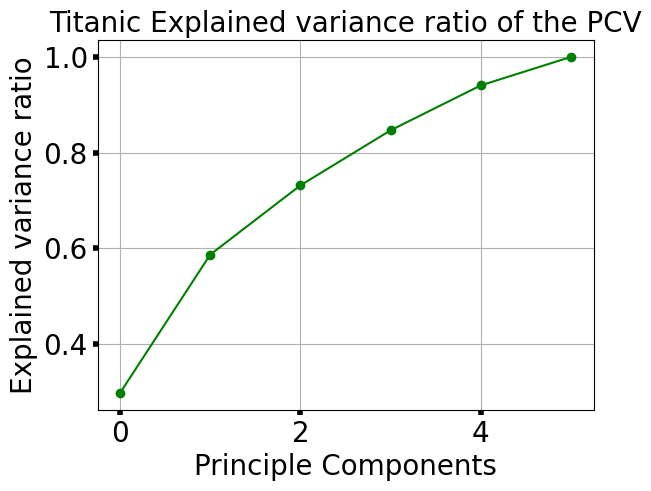

In [ ]:
# PCA
# source code: https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
scaler=StandardScaler()
X=scaler.fit_transform(X)
x_dataframe=pd.DataFrame(data=X, columns=df.columns[1:])
pca=PCA(random_state=42)
pca_result=pca.fit(x_dataframe)
variance_ratio=pca_result.explained_variance_ratio_
variance_cumsum=np.cumsum(variance_ratio)
x_range=list(range(len(variance_ratio)))
plt.plot(x_range, variance_cumsum, color='green', marker='o')
plt.grid(True)
plt.title("Titanic Explained variance ratio of the PCV",fontsize=20)
plt.xlabel("Principle Components",fontsize=20)
plt.ylabel("Explained variance ratio",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


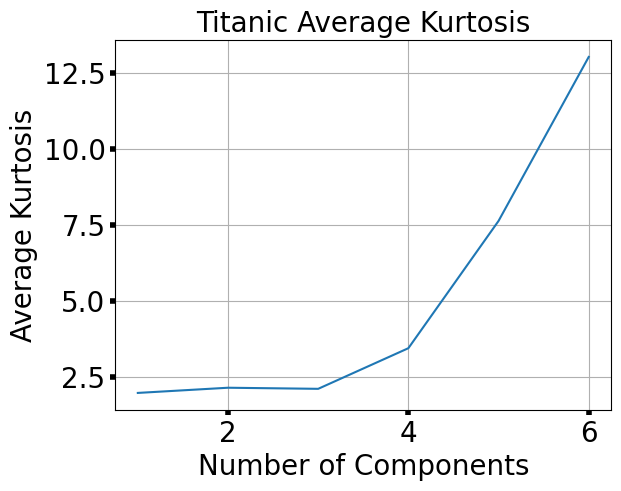

In [ ]:
# ICA
component_list=list(np.arange(1,len(x_dataframe.columns)+1))
kurt_result=[]
for i in component_list:
  ica=ICA(random_state=42, n_components=i, whiten='arbitrary-variance').fit_transform(X)
  ica=pd.DataFrame(ica)
  kurtosis=ica.kurt(axis=0)
  kurt_result.append(np.abs(kurtosis).mean())
plt.figure()
plt.plot(component_list, kurt_result)
plt.xlabel("Number of Components",fontsize=20)
plt.ylabel("Average Kurtosis",fontsize=20)
plt.grid(True)
plt.title("Titanic Average Kurtosis",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()





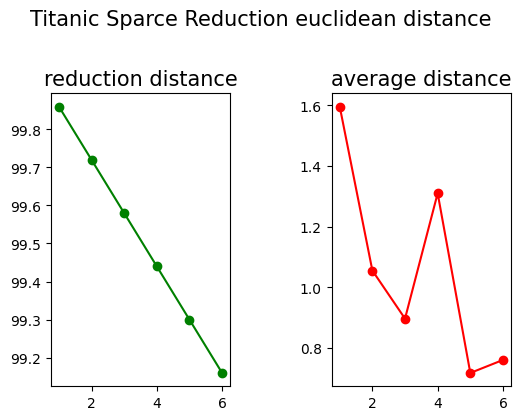

In [ ]:
from collections import defaultdict
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.metrics import euclidean_distances
num_components = list(range(1, X.shape[1] + 1))
reduction_gauss = []
mean_abs_gauss = []
abs_diff_gauss=[]
for n_component in num_components:
    SR_data = SparseRandomProjection(random_state=42, n_components=n_component)
    X_transformed = SR_data.fit_transform(X)
    distance_raw = euclidean_distances(X)
    distance_transformed = euclidean_distances(X_transformed)
    abs_diff_gauss = abs(distance_raw - distance_transformed)
    reduction_gauss.append(100 - n_component / X.shape[0] * 100)
    mean_abs_gauss.append(np.mean(abs_diff_gauss.flatten()))
fig, (ax1, ax2)=plt.subplots(1,2)
ax1.plot(num_components, reduction_gauss, marker='o', c='g')
ax1.set_title("reduction distance",fontsize=15)
ax2.plot(num_components, mean_abs_gauss, marker='o', c='r')

ax2.set_title("average distance", fontsize=15)
fig.tight_layout(pad=5)
fig.suptitle("Titanic Sparce Reduction euclidean distance", fontsize=15)
plt.show()



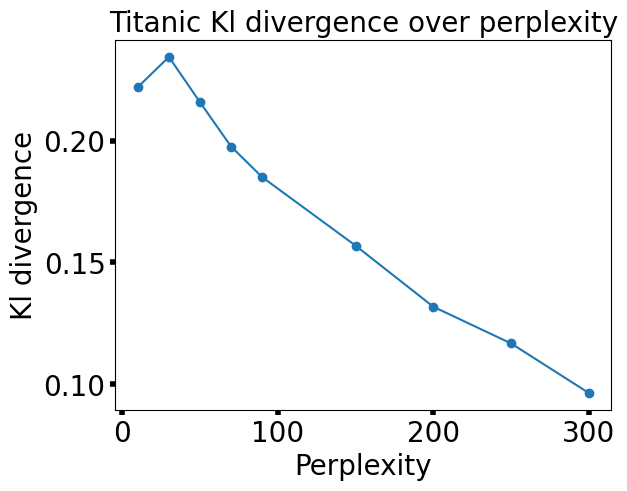

In [ ]:
# TSNE
from sklearn.manifold import TSNE
num_components = list(range(1, X.shape[1] + 1))
Kl_list=[]
perplexity_list=[10,30,50,70,90,150,200,250,300]

for j in perplexity_list:
  tsne=TSNE(n_components=3, perplexity=j)
  tsne.fit_transform(X)
  KI=tsne.kl_divergence_
  Kl_list.append(KI)
plt.figure()
plt.plot(perplexity_list, Kl_list, marker='o')
plt.xlabel("Perplexity", fontsize=20)
plt.ylabel("Kl divergence",fontsize=20)
plt.title("Titanic Kl divergence over perplexity",fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()








# **Part 3: Re-applay clustering algorithms on the four dimension reduction data**

In [ ]:
# Kmeans
n_clusters=[2,4,6,8,10]
score_pca=[]
score_ica=[]
score_srp=[]
score_tsne=[]
pca=PCA(random_state=42)
pca_result=pca.fit_transform(X)
for i in n_clusters:
  kmeans_pca=KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=42).fit(pca_result)
  score_pca.append(silhouette_score(pca_result, kmeans_pca.labels_))
ica=ICA(random_state=42)
ica_result=ica.fit_transform(X)
for i in n_clusters:
  kmeans_ica=KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=42).fit(ica_result)
  score_ica.append(silhouette_score(ica_result, kmeans_ica.labels_))
srp=SparseRandomProjection(random_state=42, n_components=6)
srp_result=srp.fit_transform(X)
for i in n_clusters:
  kmeans_srp=KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=42).fit(srp_result)
  score_srp.append(silhouette_score(srp_result, kmeans_srp.labels_))
tsne=TSNE(n_components=3, perplexity=300)
tsne_result=tsne.fit_transform(X)
for i in n_clusters:
  kmeans_tsne=KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=42).fit(tsne_result)
  score_tsne.append(silhouette_score(tsne_result, kmeans_tsne.labels_))






/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


<ipython-input-13-4b52fef7bc3e>:24: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


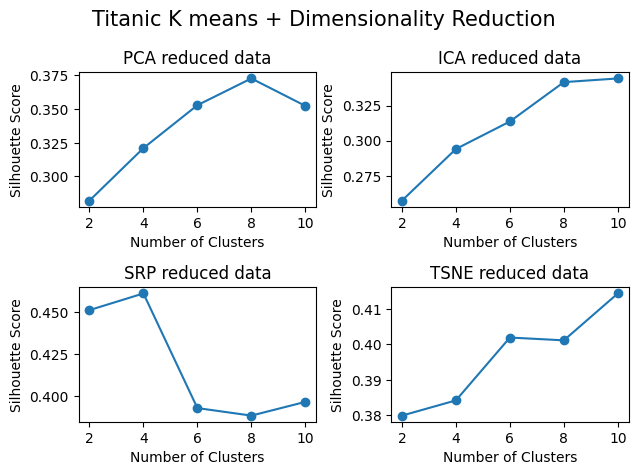

In [ ]:
fig,ax=plt.subplots(2,2, constrained_layout=True)
ax1=ax[0,0]
ax1.plot(n_clusters, score_pca, marker='o')
ax1.set_title("PCA reduced data")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Silhouette Score")
ax2=ax[0,1]
ax2.plot(n_clusters, score_ica, marker='o')
ax2.set_title("ICA reduced data")
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax3=ax[1,0]
ax3.plot(n_clusters, score_srp, marker='o')
ax3.set_title("SRP reduced data")
ax3.set_xlabel("Number of Clusters")
ax3.set_ylabel("Silhouette Score")
ax4=ax[1,1]
ax4.plot(n_clusters, score_tsne, marker='o')
ax4.set_title("TSNE reduced data")
ax4.set_xlabel("Number of Clusters")
ax4.set_ylabel("Silhouette Score")
fig.suptitle("Titanic K means + Dimensionality Reduction", fontsize=15)

fig.tight_layout()

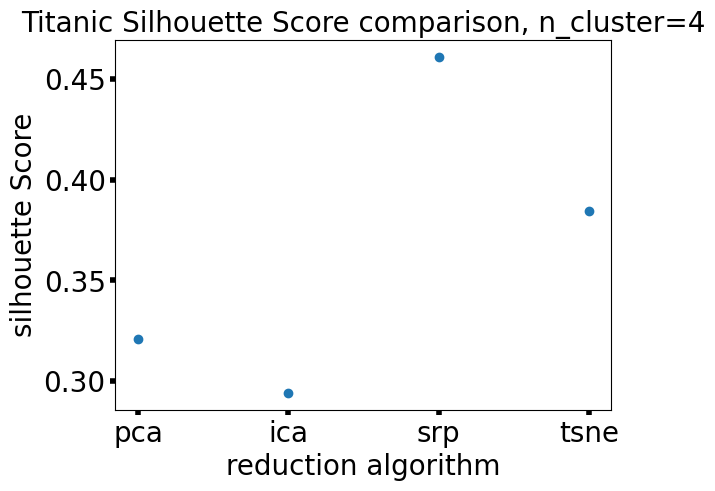

In [ ]:
kmean_list=["pca",'ica','srp','tsne']
score_result=[]
kmeans_pca=KMeans(n_clusters=4, init='k-means++', n_init=100, random_state=42).fit(pca_result)
score_result.append(silhouette_score(pca_result, kmeans_pca.labels_))
kmeans_ica=KMeans(n_clusters=4, init='k-means++', n_init=100, random_state=42).fit(ica_result)
score_result.append(silhouette_score(ica_result, kmeans_ica.labels_))
kmeans_srp=KMeans(n_clusters=4, init='k-means++', n_init=100, random_state=42).fit(srp_result)
score_result.append(silhouette_score(srp_result, kmeans_srp.labels_))
kmeans_tsne=KMeans(n_clusters=4, init='k-means++', n_init=100, random_state=42).fit(tsne_result)
score_result.append(silhouette_score(tsne_result, kmeans_tsne.labels_))
plt.figure()
plt.scatter(kmean_list,score_result)
plt.xlabel("reduction algorithm", fontsize=20)
plt.ylabel("silhouette Score",fontsize=20)
plt.title("Titanic Silhouette Score comparison, n_cluster=4", fontsize=20)
plt.tick_params(labelsize=20, width=4)
plt.show()


In [ ]:
#Gaussian Mixture

n_clusters=[2,4,6,8,10]
score_pca=[]
score_ica=[]
score_srp=[]
score_tsne=[]

pca=PCA(random_state=42)
pca_result=pca.fit_transform(X)
for i in n_clusters:
  gmm=GaussianMixture(n_components=i, random_state=42)
  gauss_pca=gmm.fit(pca_result)
  pca_label=gmm.predict(pca_result)
  score_pca.append(silhouette_score(pca_result, pca_label))

ica=ICA(random_state=42)
ica_result=ica.fit_transform(X)
for i in n_clusters:
  gmm=GaussianMixture(n_components=i, random_state=42)
  gauss_ica=gmm.fit(ica_result)
  ica_label=gmm.predict(ica_result)
  score_ica.append(silhouette_score(ica_result,ica_label ))

srp=SparseRandomProjection(random_state=42, n_components=6)
srp_result=srp.fit_transform(X)
for i in n_clusters:
  gmm=GaussianMixture(n_components=i, random_state=42)
  gauss_srp=gmm.fit(srp_result)
  srp_label=gmm.predict(srp_result)
  score_srp.append(silhouette_score(srp_result,srp_label ))

tsne=TSNE(n_components=3, perplexity=300)
tsne_result=tsne.fit_transform(X)
for i in n_clusters:
  gmm=GaussianMixture(n_components=i, random_state=42)
  gauss_tsne=gmm.fit(tsne_result)
  tsne_label=gmm.predict(tsne_result)
  score_tsne.append(silhouette_score(tsne_result,tsne_label ))

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


<ipython-input-34-e27a60ab0481>:24: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


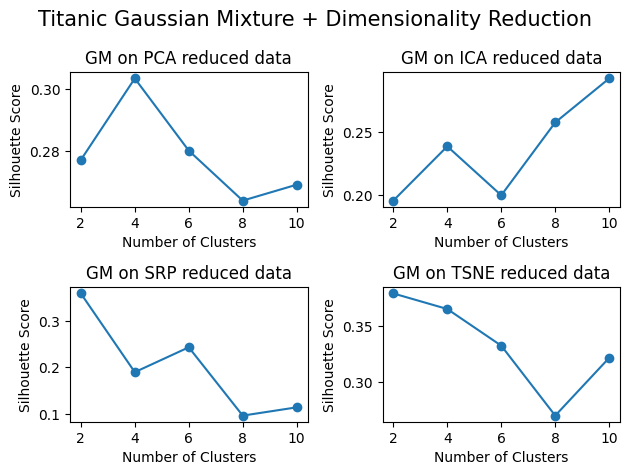

In [ ]:
fig,ax=plt.subplots(2,2, constrained_layout=True)
ax1=ax[0,0]
ax1.plot(n_clusters, score_pca, marker='o')
ax1.set_title("GM on PCA reduced data")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Silhouette Score")
ax2=ax[0,1]
ax2.plot(n_clusters, score_ica, marker='o')
ax2.set_title("GM on ICA reduced data")
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax3=ax[1,0]
ax3.plot(n_clusters, score_srp, marker='o')
ax3.set_title("GM on SRP reduced data")
ax3.set_xlabel("Number of Clusters")
ax3.set_ylabel("Silhouette Score")
ax4=ax[1,1]
ax4.plot(n_clusters, score_tsne, marker='o')
ax4.set_title("GM on TSNE reduced data")
ax4.set_xlabel("Number of Clusters")
ax4.set_ylabel("Silhouette Score")
fig.suptitle("Titanic Gaussian Mixture + Dimensionality Reduction", fontsize=15)

fig.tight_layout()

<ipython-input-35-eae45f1c5429>:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


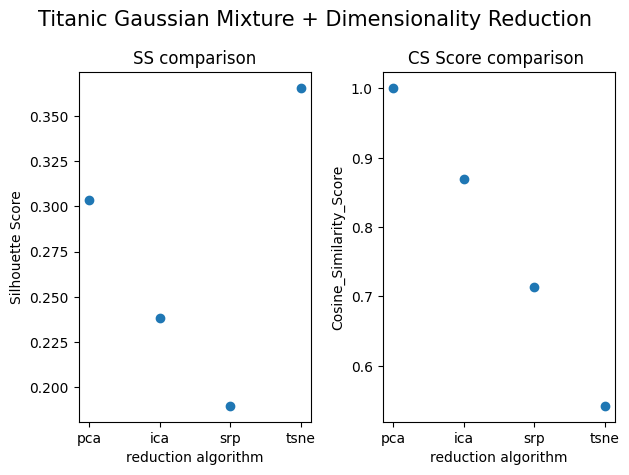

In [ ]:
gmm=GaussianMixture(n_components=4, random_state=42)
gmm_result=gmm.fit(X)
gmm_label=gmm.predict(X)
gmm_label=gmm_label.reshape(1,-1)

from sklearn.metrics.pairwise import cosine_similarity
GM_list=["pca",'ica','srp','tsne']
score_result=[]
cosine_similarity_list=[]
gauss_pca=gmm.fit(pca_result)
pca_label=gmm.predict(pca_result)
score_result.append(silhouette_score(pca_result, pca_label))
pca_label=pca_label.reshape(1,-1)
cosine_similarity_list.append(cosine_similarity(gmm_label,pca_label))

gauss_ica=gmm.fit(ica_result)
ica_label=gmm.predict(ica_result)
score_result.append(silhouette_score(ica_result, ica_label))
ica_label=ica_label.reshape(1,-1)
cosine_similarity_list.append(cosine_similarity(gmm_label,ica_label))


gauss_srp=gmm.fit(srp_result)
srp_label=gmm.predict(srp_result)
score_result.append(silhouette_score(srp_result, srp_label))
srp_label=srp_label.reshape(1,-1)
cosine_similarity_list.append(cosine_similarity(gmm_label,srp_label))


gauss_tsne=gmm.fit(tsne_result)
tsne_label=gmm.predict(tsne_result)
score_result.append(silhouette_score(tsne_result, tsne_label))
tsne_label=tsne_label.reshape(1,-1)
cosine_similarity_list.append(cosine_similarity(gmm_label,tsne_label))

fig,(ax1,ax2)=plt.subplots(1,2, constrained_layout=True)

ax1.scatter(GM_list,score_result, marker='o')
ax1.set_title("SS comparison")
ax1.set_xlabel("reduction algorithm")
ax1.set_ylabel("Silhouette Score")

ax2.scatter(GM_list,cosine_similarity_list, marker='o')
ax2.set_title("CS Score comparison ")
ax2.set_xlabel("reduction algorithm")
ax2.set_ylabel("Cosine_Similarity_Score")
fig.suptitle("Titanic Gaussian Mixture + Dimensionality Reduction", fontsize=15)
fig.tight_layout()

